In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-01-21 15:56:16--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4005:81d::201b, 2404:6800:4005:820::201b, 2404:6800:4005:800::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:81d::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65,43M  20,7MB/s    in 3,5s    

2024-01-21 15:56:20 (18,8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [1]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 2000 images = batch_size * steps
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps=50, # 1000 images = batch_size * steps
    verbose=2
)

2024-01-21 16:30:54.435157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 16:30:54.435300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 16:30:54.455169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 16:30:54.455300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 16:30:54.455444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Epoch 1/20


2024-01-21 16:30:55.788437: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2024-01-21 16:30:57.120564: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


100/100 - 5s - loss: 0.6867 - accuracy: 0.5335 - val_loss: 0.6668 - val_accuracy: 0.6260 - 5s/epoch - 45ms/step
Epoch 2/20
100/100 - 2s - loss: 0.6510 - accuracy: 0.6260 - val_loss: 0.6658 - val_accuracy: 0.5870 - 2s/epoch - 19ms/step
Epoch 3/20
100/100 - 2s - loss: 0.6025 - accuracy: 0.6810 - val_loss: 0.5874 - val_accuracy: 0.7020 - 2s/epoch - 20ms/step
Epoch 4/20
100/100 - 2s - loss: 0.5609 - accuracy: 0.7125 - val_loss: 0.6077 - val_accuracy: 0.6510 - 2s/epoch - 20ms/step
Epoch 5/20
100/100 - 2s - loss: 0.5299 - accuracy: 0.7380 - val_loss: 0.5700 - val_accuracy: 0.6920 - 2s/epoch - 20ms/step
Epoch 6/20
100/100 - 2s - loss: 0.5005 - accuracy: 0.7575 - val_loss: 0.5650 - val_accuracy: 0.7020 - 2s/epoch - 20ms/step
Epoch 7/20
100/100 - 2s - loss: 0.4711 - accuracy: 0.7725 - val_loss: 0.5629 - val_accuracy: 0.7130 - 2s/epoch - 19ms/step
Epoch 8/20
100/100 - 2s - loss: 0.4457 - accuracy: 0.7865 - val_loss: 0.5445 - val_accuracy: 0.7230 - 2s/epoch - 19ms/step
Epoch 9/20
100/100 - 2s - l

In [5]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''
    Plot the training and validation loss accuracy from a history object
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

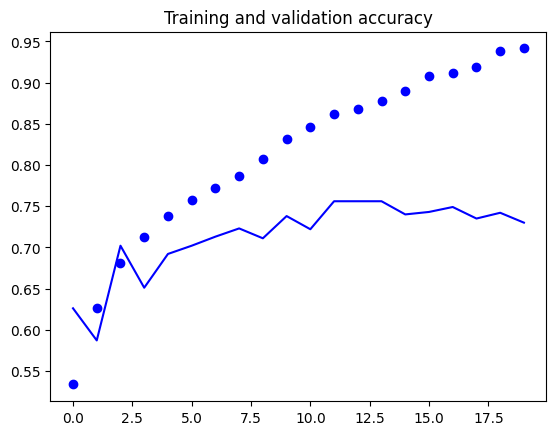

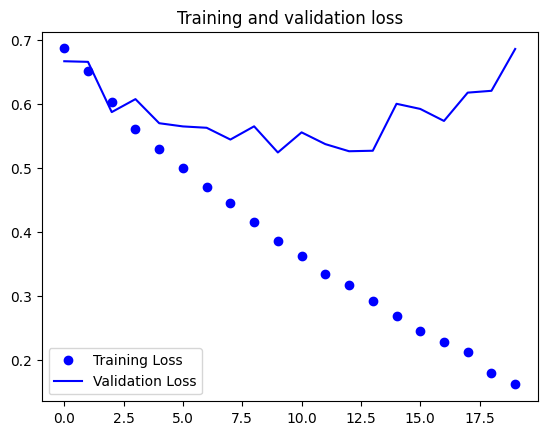

In [6]:
# Plot training results
plot_loss_acc(history)

## Data augmentation

One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if you tweak with the images a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) which you have been using to rescale the image. There are other properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

These are just a few of the options available. Let's quickly go over it:

* `rotation_range` is a value in degrees (0–180) within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Run the next cells to see the impact on the results. The code is similar to the baseline but the definition of `train_datagen` has been updated to use the parameters described above.


In [7]:
# Create new model

model_for_aug = create_model()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 6s - loss: 0.6958 - accuracy: 0.5120 - val_loss: 0.6885 - val_accuracy: 0.5120 - 6s/epoch - 58ms/step
Epoch 2/20
100/100 - 5s - loss: 0.6804 - accuracy: 0.5640 - val_loss: 0.6598 - val_accuracy: 0.5930 - 5s/epoch - 55ms/step
Epoch 3/20
100/100 - 5s - loss: 0.6642 - accuracy: 0.5930 - val_loss: 0.6402 - val_accuracy: 0.6550 - 5s/epoch - 55ms/step
Epoch 4/20
100/100 - 5s - loss: 0.6501 - accuracy: 0.6150 - val_loss: 0.6121 - val_accuracy: 0.6850 - 5s/epoch - 54ms/step
Epoch 5/20
100/100 - 5s - loss: 0.6440 - accuracy: 0.6365 - val_loss: 0.5963 - val_accuracy: 0.6900 - 5s/epoch - 54ms/step
Epoch 6/20
100/100 - 5s - loss: 0.6199 - accuracy: 0.6435 - val_loss: 0.5813 - val_accuracy: 0.6940 - 5s/epoch - 55ms/step
Epoch 7/20
100/100 - 5s - loss: 0.6140 - accuracy: 0.6700 - val_loss: 0.6197 - val_accuracy: 0.6250 - 5s/epoch - 54ms/step
Epoch 8/20
100/100 - 5s - loss: 0.6023 - accuracy: 0.68

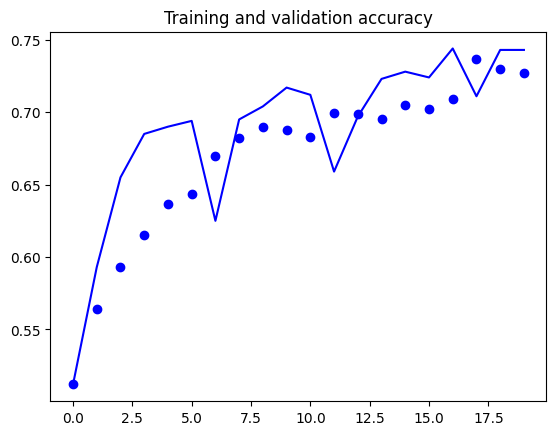

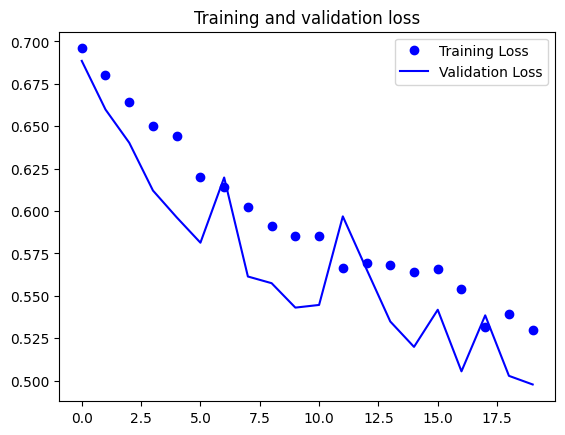

In [8]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)